# Alcubierre Metric: Impact of shell parameters

It is shown below how the York time and energy density is impacted by differing shell parameters for the Alcubierre Metric.

In [2]:
# Basic python setup
%matplotlib inline
import numpy as np
from numpy import tanh
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## The impact of shell parameters on the magnitude of the York Time

The Alcubierre Metric in typical Cartesian coordinates (and using the metric signature $-+++$) is given by:

$$
d s^{2}=-d t^{2}+\left(d x-v_{s} f\left(r_{s}\right) d t\right)^{2}+d y^{2}+d z^{2}
$$

Where $v_s$ is the apparent speed of the ship as measured by external observers, and $f(r_s)$ is a "shaping function" that creates a "warp shell" around the ship. $f(r_s)$ is defined as the following:

$$
f\left(r_{s}\right)=\frac{\tanh \left(\sigma\left(r_{s}+R\right)\right)-\tanh \left(\sigma\left(r_{s}-R\right)\right)}{2 \tanh (\sigma R)}
$$

In [3]:
# r_s is distance away from center of the warp shell
# sigma controls the shell thickness
# R is shell size (aka shell radius)
def f_rs(r_s, sigma=8, R=1):
    return (tanh(sigma * (r_s + R)) - tanh(sigma * (r_s - R)))/(2 * tanh(sigma * R))

We may then differentiate $f(r_s)$ to find $df(r_s)$, which is defined as:

$$
df(r_s) = \frac{\sigma (\tanh^2 (\sigma (R - r_s)) - \tanh^2 (\sigma (R + r_s)))}{2 \tanh (\sigma R)}
$$

In [4]:
def df_rs(r_s, sigma=8, R=1):
    return (sigma * (tanh(sigma * (R - r_s)) ** 2 - tanh(sigma * (R + r_s)) ** 2)) / (2 * tanh(sigma * R))

As mentioned previously, $r_s$ is the distance away from the center of the shell, and is given by:

$$
r_s(t) =\sqrt{\left(x-x_{s}(t)\right)^2 +y^{2}+z^{2}}
$$

Where $x_s(t)$ is the position of the spacecraft (which is also at the center of the warp shell, the warp shell moves unidirectionally), and $x$ is a point outside of the warp shell, where spacetime is flat (i.e. there is no expansion or contraction). Taking the derivative of $r_s$ gives us $dr_s$, defined as follows:

In [5]:
# rho is "compressed" y and z into 1 dimension
# i.e. rho = (y ** 2 + z ** 2) ** (1/2)
def d_rs(x, rho, x_s=2.5):
    return ((x - x_s)**2 + rho**2)**(1/2)

We may now find the York Time, Here, I will demonstrate the effect of changing both $\sigma$ and $R$ (respectively controlling the thickness and size of the shell) to effect a change on the magnitude of the York time. York time is given by:

$$
\theta=v_{s} \frac{x_{s}}{r_{s}} \frac{d f\left(r_{s}\right)}{d r_{s}}
$$

In [6]:
def theta(x, rho, x_s=2.5, v_s=1, sigma=8, R=1):
    drs = d_rs(x, rho, x_s)
    dfrs = df_rs(drs, sigma, R)
    return v_s * ((x - x_s) / drs) * dfrs

The following graphs are animations of York time given different shell parameters. The first animated graph shows the effect of changing $\sigma$, the shell thickness controlling parameter. It should be noted that $\sigma$ is not actually the thickness of the warp shell, because the actual thickness is given by $\frac{1}{\sigma}$. The graph is below:

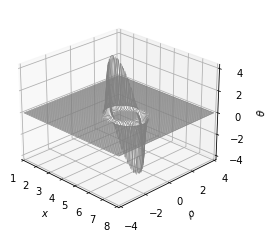

In [7]:
# Generate input vectors.
samples = 160
x = np.linspace(1.0, 8.0, num=samples)
p = np.linspace(-4.0, 4.0, num=samples)

# Generate coordinate matrices from coordinate vectors.
X, P = np.meshgrid(x, p)

# Get york time
Z = theta(X, P, x_s = 5)

# Calculate the york time over frames
# x_s = 5 is to center the warp shell to make it look nicer
def data(i, Z, line):
    ax.clear()
    # Set the angle of the camera
    ax.view_init(25, -45)

    # Add latex math labels.
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel(r'$\theta$')

    # Set the axis limits
    ax.set_xlim(1.0, 8.0)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-4.2, 4.2)
    
    # Calculate metric tensor
    Z = theta(X, P, x_s = 5, sigma=i)
    line = ax.plot_wireframe(X, P, Z, 
                                rstride=2,
                                cstride=2,
                                linewidth=0.5,
                                antialiased=True,
                                color='gray')
    return line,

# Create the Figure.
fig = plt.figure()
ax = plt.axes(projection='3d')

# Set the angle of the camera
ax.view_init(25, -45)

# Add latex math labels.
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho$')
ax.set_zlabel(r'$\theta$')

# Set the axis limits
ax.set_xlim(1.0, 8.0)
ax.set_ylim(-4, 4)
ax.set_zlim(-4.2, 4.2)

line = ax.plot_wireframe(X, P, Z, 
                                rstride=2,
                                cstride=2,
                                linewidth=0.5,
                                antialiased=True,
                                color='gray')

anim = FuncAnimation(fig, 
                     data,
                     frames = np.arange(0.1, 10, 0.1),
                     fargs=(Z, line),
                     blit=True)

HTML(anim.to_jshtml())

It is easily seen that as the value of $\sigma$ increases (in this case, from 0.1 to 10), the bubble thickness decreases. More simply, the bubble becomes tighter and smaller as we increase $\sigma$. This is because the thickness of the bubble is $\frac{1}{\sigma}$. As we increase $\sigma$, and thereby make the bubble thinner, the York time magnitude increases significantly. In short, **a thicker and "sloppier" bubble reduces the York time magnitude**, which in turn (as will be shown later) decreases the energy density. This comes with the unappealing characteristic that while thicker warp shells may require less energy to create, they also have less usable flat space within, which reduces the maximum size of the ship occupying the space.

The second animated graph shows the effect of changing only $R$, the shell radius:

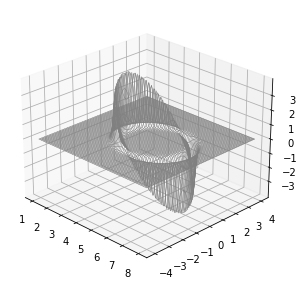

In [16]:
# Generate input vectors.
samples = 160
x = np.linspace(1.0, 8.0, num=samples)
p = np.linspace(-4.0, 4.0, num=samples)

# Generate coordinate matrices from coordinate vectors.
X, P = np.meshgrid(x, p)

# Get york time
Z = theta(X, P, x_s = 5)

# Calculate the york time over frames
# x_s = 5 is to center the warp shell to make it look nicer
def data(i, Z, line):
    ax.clear()
    Z = theta(X, P, x_s = 5, R=i)
    line = ax.plot_wireframe(X, P, Z, 
                                rstride=2,
                                cstride=2,
                                linewidth=0.5,
                                antialiased=True,
                                color='gray')
    return line,

# Create the Figure.
fig = plt.figure()
ax = plt.axes(projection='3d')

# Set the angle of the camera
ax.view_init(25, -45)

# Add latex math labels.
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho$')
ax.set_zlabel(r'$\theta$')

# Set the axis limits
ax.set_xlim(1.0, 8.0)
ax.set_ylim(-4, 4)
ax.set_zlim(-4.2, 4.2)

line = ax.plot_wireframe(X, P, Z, 
                                rstride=2,
                                cstride=2,
                                linewidth=0.5,
                                antialiased=True,
                                color='gray')

anim = FuncAnimation(fig, 
                     data,
                     frames = np.arange(0.5, 2, 0.1),
                     fargs=(Z, line),
                     blit=True)

HTML(anim.to_jshtml())

It is easily seen that as the value of $R$ increases, the space inside the shell increases, but this has no effect on the York time magnitude.

## The impact of the shell parameters on the energy density

We will now explore the effect of the shell parameters on the energy density. The energy density is given by:

$$
\frac{1}{8\pi}G^{00}=-\frac{1}{8\pi}\frac{v_s^2 \rho^2}{4r_s^2}\left(\frac{df\left(r_s\right)}{dr_s}\right)^2
$$

In [9]:
def energy_density(x, rho, x_s=2.5, v_s=1, sigma=8, R=1):
    r_s = ((x - x_s)**2 + rho**2)**(1/2)
    drs = d_rs(x, rho, x_s)
    dfrs = df_rs(drs, sigma, R)
    return (-1/(8 * np.pi)) * ((v_s ** 2 * rho ** 2)/(4 * r_s ** 2)) * ((dfrs / drs) ** 2)

The following graphs are animations of energy density given different shell parameters. The first animated graph shows the effect of changing $\sigma$, which controls the shell thickness:

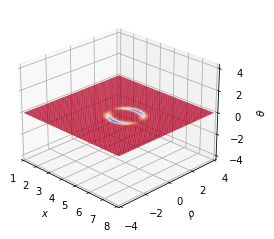

In [10]:
# Generate input vectors.
samples = 160
x = np.linspace(1.0, 8.0, num=samples)
p = np.linspace(-4.0, 4.0, num=samples)

# Generate coordinate matrices from coordinate vectors.
X, P = np.meshgrid(x, p)

# Get york time
Z = theta(X, P, x_s = 5)

# Calculate the york time over frames
# x_s = 5 is to center the warp shell to make it look nicer
def data(i, Z, line):
    # To prevent an "overlay" effect
    ax.clear()

    # Set the angle of the camera
    ax.view_init(25, -45)

    # Add latex math labels.
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel(r'$\theta$')

    # Set the axis limits
    ax.set_xlim(1.0, 8.0)
    ax.set_ylim(-4, 4)
    ax.set_zlim(-4.2, 4.2)
    
    # Calculate york time
    Z = energy_density(X, P, x_s = 5, sigma=i)
    line = ax.plot_surface(X, P, Z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.1)
    return line,

# Create the Figure.
fig = plt.figure()
ax = plt.axes(projection='3d')

# Set the angle of the camera
ax.view_init(25, -45)

# Add latex math labels.
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho$')
ax.set_zlabel(r'$\theta$')

# Set the axis limits
ax.set_xlim(1.0, 8.0)
ax.set_ylim(-4, 4)
ax.set_zlim(-4.2, 4.2)

line = ax.plot_surface(X, P, Z, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.1)

anim = FuncAnimation(fig, 
                     data,
                     frames = np.arange(0.5, 5, 0.1),
                     fargs=(Z, line),
                     blit=True)

HTML(anim.to_jshtml())

It is easily seen that as the value of $\sigma$ increases, we have a thinner shell, and the energy density magnitude increases. Thus, we may conclude that **a thicker warp shell results in lower energy density requirements**.